# Churn Prediction

Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, it can cost five times more to attract a new customer than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

Churn is a measurement of business that shows customers who stop doing business with a company or a service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans. 

But what if you could know in advance that a specific customer is likely to leave your business, and have a chance to take proper actions in time to prevent it from happening?
The reasons that lead customers to the cancellation decision can be numerous, coming from poor service quality, delay on customer support, prices, new competitors entering the market, and so on. Usually, there is 
no single reason, but a combination of events that culminated in customer displeasure.

If your company were not capable to identify these signals and take actions prior to the cancel button click, there is no turning back, your customer is already gone. But you still have something valuable: the data. Your customer left very good clues about where you left to be desired. It can be a valuable source for meaningful insights and to train customer churn models. Learn from the past, and have strategic information at hand to improve future experiences, it's all about machine learning.

When it comes to the telecommunications segment, there is great room for opportunities. The wealth and the amount of customer data that carriers collect can contribute a lot to shift from a reactive to a proactive position. The emergence of sophisticated artificial intelligence and data analytics techniques further help leverage this rich data to address churn in a much more effective manner.
In this article, I'm going to use a customer base dataset from an anonymous carrier, made available by the platform IBM Developer. 

The main goal is to develop a machine learning model capable to predict customer churn based on the customer's data available. I will use mainly Python, Pandas, and Scikit-Learn libraries for this implementation.
To accomplish that, we will go through the below steps:

* Exploratory analysis
* Data preparation
* Train, tune and evaluate machine learning models

## Project Initial Setup

In [ ]:
# install scikit plot package
!pip install scikit-plot

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler

# configure graph style
sns.set_style('darkgrid')
#palette=sns.color_palette("GnBu_d")
#palette=sns.color_palette("BuGn_r")
#palette = sns.light_palette("navy", reverse=True)
palette = sns.color_palette("coolwarm", 7)

import warnings # to ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install imblearn

## The Data

This dataset contains a total of 7,043 customers and 21 attributes, coming from personal characteristics, services signatures, and contract details. Out of the entries, 5,174 are active customers and 1,869 are churned, which demonstrates that the dataset is highly unbalanced. The target variable for this assessment is going to be the feature Churn.

### *Importing dataset*

In [ ]:
# importing data
DATA_PATH = "/content/Telco_customer_churn_services_Final_datasheet (1).xlsx"
df = pd.read_excel(DATA_PATH)

# check first 5 entries
df.head()

,Customer ID,Gender,Age,Married,Dependents,Senior Citizen,Tenure in Months,Offer,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Churn
0,8779-QRDMV,Male,78,No,No,Yes,1,None,No,No,...,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,Yes
1,7495-OOKFY,Female,74,Yes,Yes,Yes,8,Offer E,Yes,Yes,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,Yes
2,1658-BYGOY,Male,71,No,Yes,Yes,18,Offer D,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,Yes
3,4598-XLKNJ,Female,78,Yes,Yes,Yes,25,Offer C,Yes,No,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,Yes
4,4846-WHAFZ,Female,80,Yes,Yes,Yes,37,Offer C,Yes,Yes,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,Yes


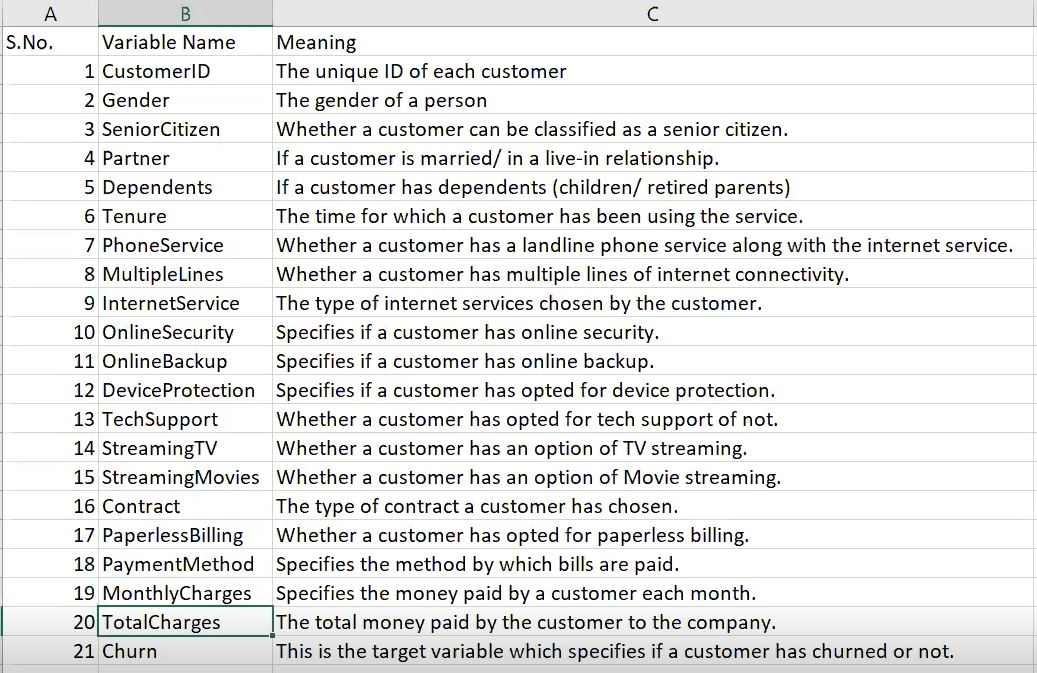

### *Dataframe size and info*

In [ ]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
get_df_size(df)

Dataset dimensions 
# Attributes:  23 
# Entries:  7043 



### *Features and data types*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer ID              7043 non-null   object 
 1   Gender                   7043 non-null   object 
 2   Age                      7043 non-null   int64  
 3   Married                  7043 non-null   object 
 4   Dependents               7043 non-null   object 
 5   Senior Citizen           7043 non-null   object 
 6   Tenure in Months         7043 non-null   int64  
 7   Offer                    7043 non-null   object 
 8   Phone Service            7043 non-null   object 
 9   Multiple Lines           7043 non-null   object 
 10  Internet Service         7043 non-null   object 
 11  Internet Type            7043 non-null   object 
 12  Avg Monthly GB Download  7043 non-null   int64  
 13  Streaming TV             7043 non-null   object 
 14  Streaming Movies        

## Exploratory Analysis








### Checking missing values

Before checking the missing values, we are going to replace all the blank spaces ocurreces that this dataset might have.

In [ ]:
# replacing all the blank values with NaN 
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
Customer ID                0
Gender                     0
Age                        0
Married                    0
Dependents                 0
Senior Citizen             0
Tenure in Months           0
Offer                      0
Phone Service              0
Multiple Lines             0
Internet Service           0
Internet Type              0
Avg Monthly GB Download    0
Streaming TV               0
Streaming Movies           0
Streaming Music            0
Unlimited Data             0
Contract                   0
Paperless Billing          0
Payment Method             0
Monthly Charge             0
Total Charges              0
Churn                      0
dtype: int64



### Unique values per feature

By checking feature's unique values we can see that the column `customerID` have unique identifiers for each customer, which confirms that each row represents a single customer. This feature does not contribute for this analysis, therefore we are going to drop the column.

In [ ]:
print("Unique values (per feature): \n{}\n".format(df.nunique()))

Unique values (per feature): 
Customer ID                7043
Gender                        2
Age                          62
Married                       2
Dependents                    2
Senior Citizen                2
Tenure in Months             72
Offer                         6
Phone Service                 2
Multiple Lines                2
Internet Service              2
Internet Type                 4
Avg Monthly GB Download      50
Streaming TV                  2
Streaming Movies              2
Streaming Music               2
Unlimited Data                2
Contract                      3
Paperless Billing             2
Payment Method                3
Monthly Charge             1585
Total Charges              6540
Churn                         2
dtype: int64



In [ ]:
df_clean = df_clean.drop('Customer ID', axis=1)

### *Descriptive statistics*

In [ ]:
df_clean.describe()

,Age,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Total Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,32.386767,20.515405,64.761692,2280.381264
std,16.750352,24.542061,20.418940,30.090047,2266.220462
min,19.000000,1.000000,0.000000,18.250000,18.800000
25%,32.000000,9.000000,3.000000,35.500000,400.150000
50%,46.000000,29.000000,17.000000,70.350000,1394.550000
75%,60.000000,55.000000,27.000000,89.850000,3786.600000
max,80.000000,72.000000,85.000000,118.750000,8684.800000


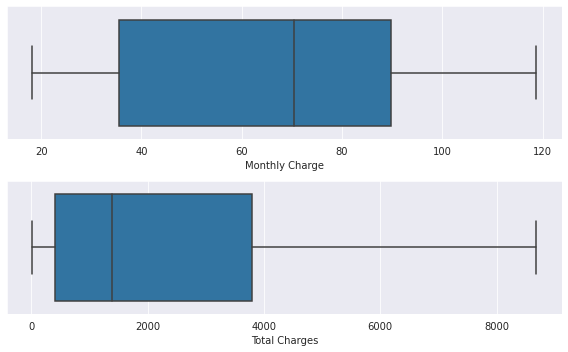

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5))

sns.boxplot(df_clean['Monthly Charge'], ax=ax[0])
sns.boxplot(df_clean['Total Charges'], ax=ax[1])

plt.tight_layout()

### *Dataset features and their values*

This is a very important information to help us to undesrstand the dataset will be working with. Few observations:


*   Feature `SeniorCitizen` is binary, entries have value 1 for **Yes** and 0 for **No**
*   Feature `Tenure` has the max value in 72, which can indicate that this service provider has maximum of 6 years
*   The only features that are not categorical are `Monthly Charges` and `TotalCharges`, all the remaining are categorical kinds



In [ ]:
features_obj = df_clean.columns

for f in features_obj:
  print(f)
  print(np.unique(df_clean[f].values))

Gender
['Female' 'Male']
Age
[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
Married
['No' 'Yes']
Dependents
['No' 'Yes']
Senior Citizen
['No' 'Yes']
Tenure in Months
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
Offer
['None' 'Offer A' 'Offer B' 'Offer C' 'Offer D' 'Offer E']
Phone Service
['No' 'Yes']
Multiple Lines
['No' 'Yes']
Internet Service
['No' 'Yes']
Internet Type
['Cable' 'DSL' 'Fiber Optic' 'None']
Avg Monthly GB Download
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 39 41 42 46 47 48 51 52 53 56 57 58 59 69 71 73 75 76
 82 85]
Streaming TV
['No' 'Yes']
Streaming Movies
['No' 'Yes']
Streaming Music
['No' 'Yes']
Unlimit

### *Customer lifespan*

#### *Helper Functions*

In [ ]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

#### *How long is the customer lifespan until subscription cancellation?*

- The majority of churn rate is observed on the subscription first month, totalling 20.3% of subscribers leave on the first month
- Most of the subscribers leave on the first 3 months, totalling 31.9% of the total churn


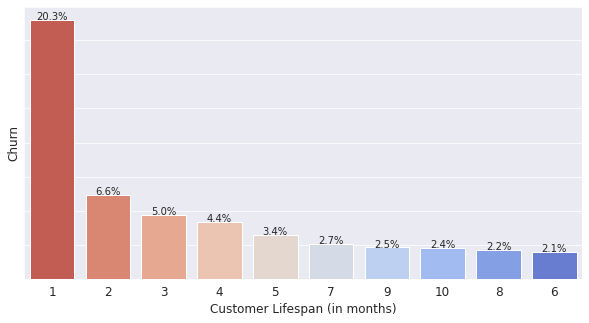

In [ ]:
p = sns.color_palette("coolwarm", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['Tenure in Months'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10]['Tenure in Months'], ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

### *Understanding the profile of churn customers*

#### *Helper Functions*

In [ ]:
# # helper funtion - display count plot
# def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5)):
  
#   """
#     Display countplot based on a set of features

#     # Arguments
#       cat_list: array, List of features
#       df: DataFrame, dataset
#       rows: int, number of rows
#       columns: int, number of columns
#       figsize: figure size, e.g (10, 5)

#   """

#   fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
#   idx = 0
#   for c in cat_list:
#     idx += 1
#     plt.subplot(rows, columns, idx)
#     ax = sns.countplot(x=df[c], data=df, palette=palette)

#     plt.xticks(size=10)
#     plt.xlabel('')
#     plt.yticks(size=12)
#     plt.ylabel('')
#     plt.subplots_adjust(hspace = 0.4)
#     ax.tick_params(labelleft=False)
#     ax.set_title(c, alpha=0.8)

#     print_rate(ax, df.shape[0])

#   plt.tight_layout()
#   plt.show()

#   return fig

# def print_rate(ax, total):
#   for p in ax.patches:
#     text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
#     x = p.get_x() + p.get_width() / 2
#     y = p.get_y() + p.get_height() * 0.5
#     ax.annotate(text, (x, y), size = 10, ha="center", va="center")

In [ ]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['Senior Citizen'] == 0,'Senior Citizen'] = 'No' 
df_churn.loc[df_churn['Senior Citizen'] == 1,'Senior Citizen'] = 'Yes'

personal_attributes = ['Gender', 'Senior Citizen', 'Married', 'Dependents']
services_attributes = ['Phone Service', 'Multiple Lines', 'Internet Service',
                       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Offer']
contract_attributes = ['Contract', 'Paperless Billing', 'Payment Method']

In [ ]:
df_clean[df_clean['Churn'] == 'Yes']['Offer'].value_counts()

None       1051
Offer E     426
Offer D     161
Offer B     101
Offer C      95
Offer A      35
Name: Offer, dtype: int64

In [ ]:
df_clean[df_clean['Churn'] == 'No']['Offer'].value_counts()

None       2826
Offer B     723
Offer A     485
Offer D     441
Offer E     379
Offer C     320
Name: Offer, dtype: int64

In [ ]:
def plot(col, title, palette, edgecolor):

    value = df_churn[col].value_counts()[1]
    plt.figure(figsize = (15,10))
    plt.subplot(2,2,1)
    sns.countplot(df_churn[col], palette = palette, edgecolor = edgecolor, order=df_churn[col].value_counts().index, alpha = 1.0, saturation=1);
    sns.lineplot(df_churn[col].value_counts().index, df_churn[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    # colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

    plt.pie(df_churn[col].value_counts(), autopct = "%.2f",
       labels = df_churn[col].value_counts().index , shadow = True, explode = [0.1]*len(df_churn[col].value_counts().index), startangle = -135);
    plt.title(title);
    plt.show()


#### *a) In terms of personal attibutes*

Let's review which personal charactiristic contribute mostly for the cancellation decision. From the available dataset those are:

*   `Gender`
*   `SeniorCitizen`
*   `Partner`
*   `Dependents`

Below charts can provide some meaningful insights such as:
* Male and Female distribution against chrun is almost equal
* Customers without dependents are 4 times more likely to churn
* Senior citizens are 3 times less likely to churn
* Customers who are having dependents are very less likely to chrun



Gender


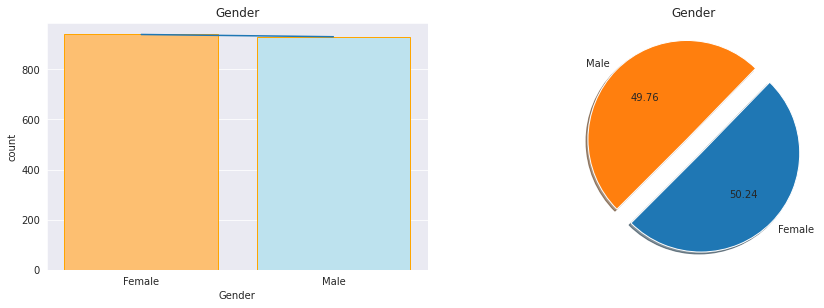

Senior Citizen


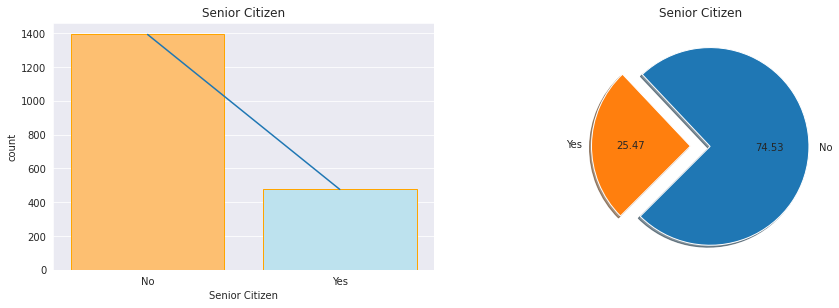

Married


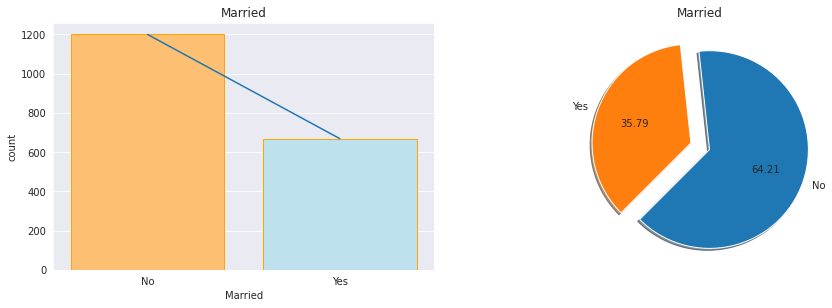

Dependents


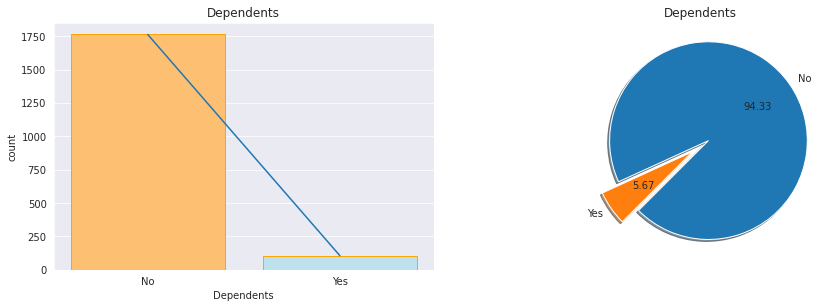

In [ ]:
for col in personal_attributes: # iterating columns
    print(col)
    plot(col, col, 'RdYlBu', 'orange')

#### *b) In terms of services*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`PhoneService`
*	`MultipleLines`
*	`InternetService`
*	`OnlineSecurity`
*	`OnlineBackup`
*	`DeviceProtection`
*	`TechSupport`
*	`StreamingTV`
*	`StreamingMovies`

The below charts show the features where high discrepancies between the classes could be noticed. It gives insights regarding which kind of carrier services the customers that are more likely to defeat make use:
* The majority of customers that cancel their subscription have Phone Service enabled
* Customers that have Fiber-Optic Internet Service are more likely to cancel than those who have DSL
* Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave



Phone Service


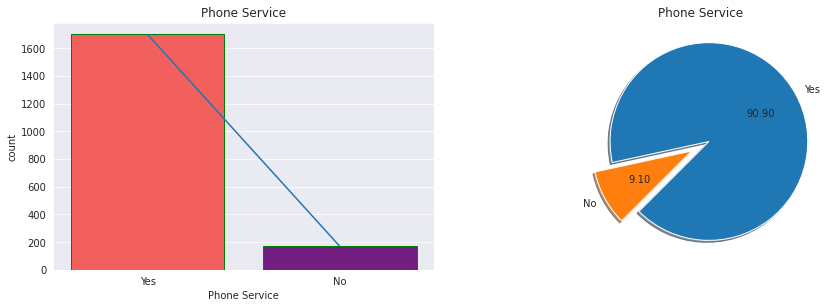

Multiple Lines


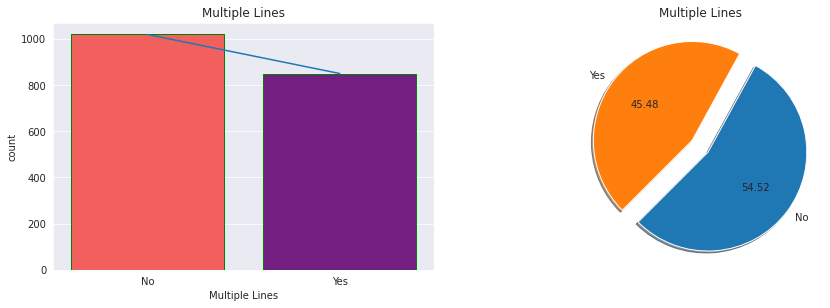

Internet Service


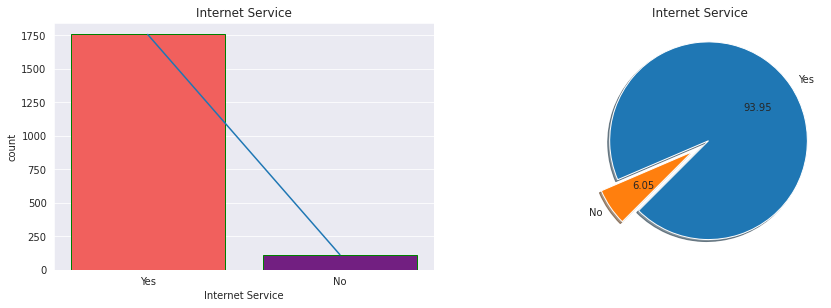

Streaming TV


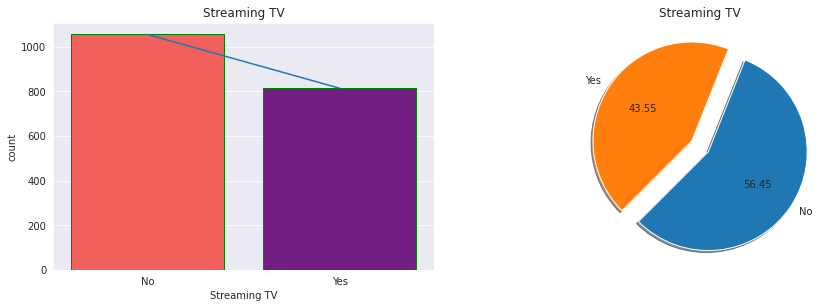

Streaming Movies


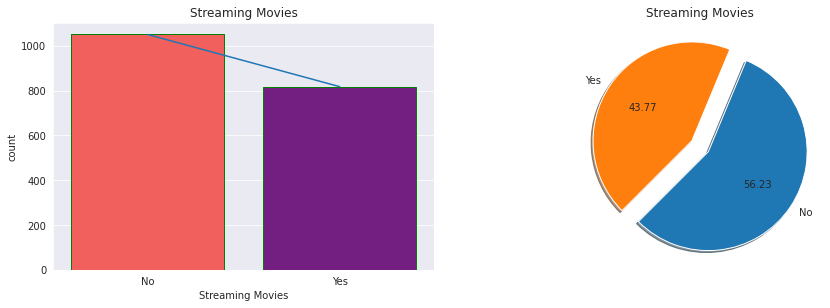

Streaming Music


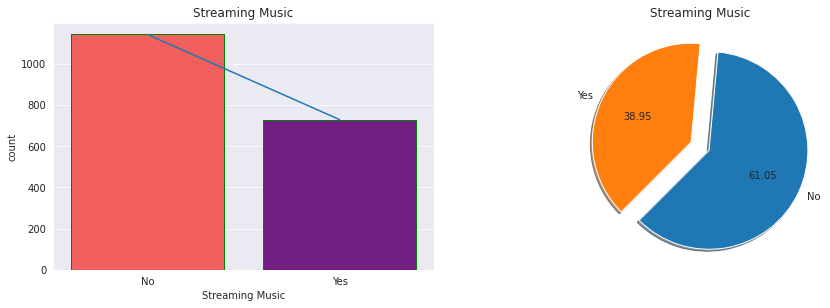

Unlimited Data


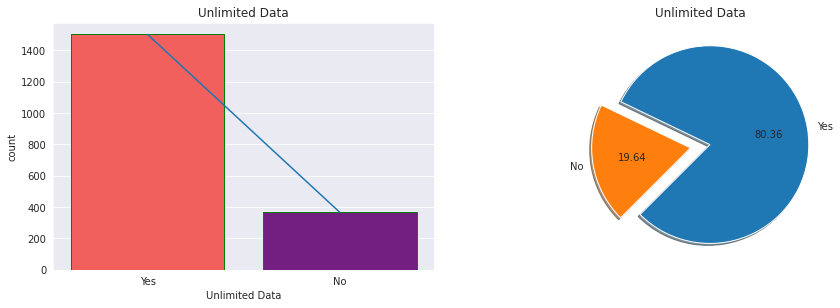

Offer


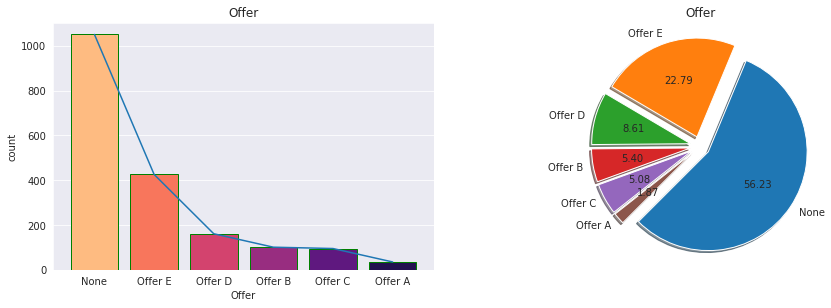

In [ ]:
for col in services_attributes: # iterating columns
    print(col)
    plot(col, col, 'magma_r', 'green')

#### *c) In terms of contract aspects*

Let's review which personal charactiristic contributes mostly for the cancellation decision. From the available dataset those are:

*	`Contract`
*	`PaperlessBilling`
*	`PaymentMethod`

Below charts give insights regarding the contract aspects that can make a subscriber more likely to churn:
* The majority of customers that cancel their subscription have
Month-to-month Contract type and Paperless Billing enabled
* Customers that have Payment Method as Eletronic Check are more likely to leave




Contract


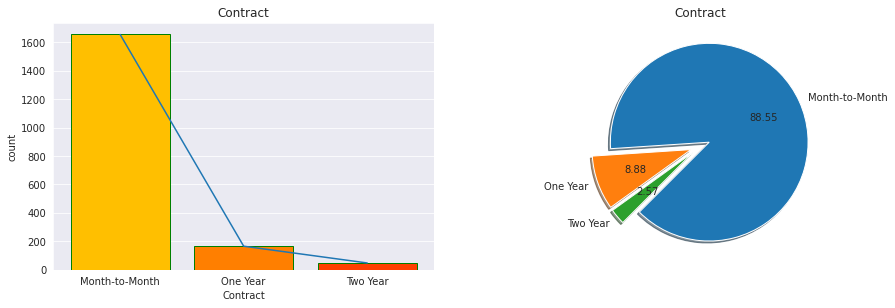

Paperless Billing


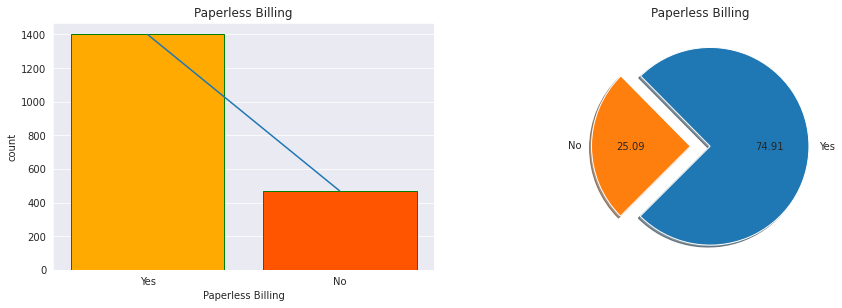

Payment Method


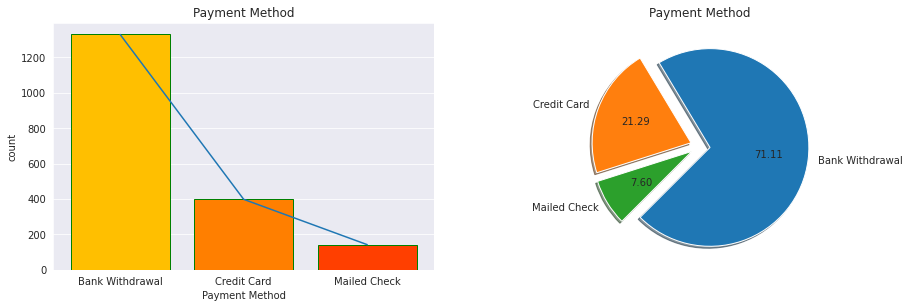

In [ ]:
for col in contract_attributes: # iterating columns
    print(col)
    plot(col, col, 'autumn_r', 'green')

In [ ]:
df_churn['Payment Method'] = df_churn['Payment Method'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

# fig = displayCountPlot(contract_attributes, df_churn, rows=1, columns=3)

### *Imbalanced data*

Column `Churn` is the target vector to be used to train the ML models. The class `No` have much more entries then class `Yes`, which demonstrates that the dataset is highly imbalanced. Ideally the dataset should be balanced to avoid models overfitting.

No     5174
Yes    1869
Name: Churn, dtype: int64


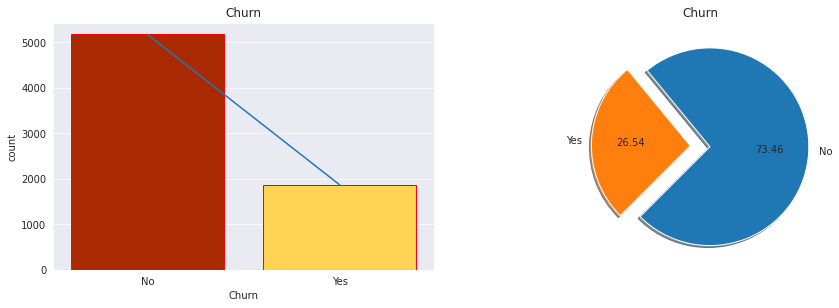

In [ ]:
value = df_clean['Churn'].value_counts()
print(value)

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(df_clean['Churn'], palette = 'afmhot', edgecolor = 'red', order=value.index, alpha = 1.0, saturation=1);
sns.lineplot(value.index, value.values, palette='seismic')
plt.title('Churn');

plt.subplot(2,2,2)
# colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

plt.pie(value, autopct = "%.2f",
    labels = value.index , shadow = True, explode = [0.1]*len(value.index), startangle = -135);
plt.title('Churn');
plt.show()

## Data Preparation








### *Split features into binary, numeric or categorical*

In [ ]:
binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]

df_proc = df_clean.copy()

In [ ]:
# categorical_feat.remove('Customer ID')

### *Features encoding*

#### *a) Apply label encoding for binary features*

In [ ]:
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[f].values))

Gender 
 ['No' 'Yes']
Married 
 ['No' 'Yes']
Dependents 
 ['No' 'Yes']
Senior Citizen 
 ['No' 'Yes']
Phone Service 
 ['No' 'Yes']
Multiple Lines 
 ['No' 'Yes']
Internet Service 
 ['No' 'Yes']
Streaming TV 
 ['No' 'Yes']
Streaming Movies 
 ['No' 'Yes']
Streaming Music 
 ['No' 'Yes']
Unlimited Data 
 ['No' 'Yes']
Paperless Billing 
 ['No' 'Yes']
Churn 
 [0 1]


#### *b) Convert categorical variable into dummy variables*

In [ ]:
print(categorical_feat)
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
print(df_proc.columns)

['Offer', 'Internet Type', 'Contract', 'Payment Method']
Index(['Gender', 'Age', 'Married', 'Dependents', 'Senior Citizen',
       'Tenure in Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Churn',
       'Offer_None', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C',
       'Offer_Offer D', 'Offer_Offer E', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Internet Type_None',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dtype='object')


### *Processed dataset / Ready for ML training*

In [ ]:
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')

df_proc.head()

Original dataset: 
# Attributes:  23 
# Entries:  7043 

Processed dataset: 
# Attributes:  34 
# Entries:  7043 



,Gender,Age,Married,Dependents,Senior Citizen,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Avg Monthly GB Download,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Churn,Offer_None,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,1,78,0,0,1,1,0,0,1,8,0,1,0,0,1,39.65,39.65,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,74,1,1,1,8,1,1,1,17,0,0,0,1,1,80.65,633.30,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,1,71,0,1,1,18,1,1,1,52,1,1,1,1,1,95.45,1752.55,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
3,0,78,1,1,1,25,1,0,1,12,1,1,0,1,1,98.50,2514.50,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,0,80,1,1,1,37,1,1,1,14,0,0,0,1,1,76.50,2868.15,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
df_proc.to_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed.csv', index=False)

In [ ]:
df_proc.shape

(7043, 34)

### *Split train and test data*

In [ ]:
# split df_proc in feature matrix and target vector
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test

,Customer ID,Gender,Age,Married,Dependents,Senior Citizen,Tenure in Months,Phone Service,Multiple Lines,Internet Service,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
1406,4791-QRGMF,1,33,1,0,0,59,1,1,1,...,0,0,1,0,0,1,0,1,0,0
3543,5014-WUQMG,1,23,1,1,0,47,1,0,1,...,0,0,1,0,0,1,0,1,0,0
6687,0939-EREMR,0,40,0,1,0,13,1,0,1,...,1,0,0,0,1,0,0,0,1,0
2151,2982-VPSGI,0,64,1,0,0,11,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3175,4883-KCPZJ,0,30,1,1,0,22,1,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,9888-ZCUMM,1,48,1,1,0,64,0,0,1,...,0,1,0,0,0,0,1,1,0,0
4525,9931-DCEZH,1,55,0,1,0,28,1,0,1,...,0,1,0,0,0,1,0,0,1,0
6851,4011-ARPHK,1,59,0,0,0,27,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5219,5120-ZBLAI,0,40,1,0,0,50,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# # under sampling
# rus = RandomUnderSampler()
# X, y = rus.fit_resample(X, y)

In [ ]:
X['Chrun'] = y.values
X.to_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed_balaced.csv')

### *Balancing the data*
Here, using downsampling technique. Under-sample the majority class(es) by randomly picking samples with or without replacement to prevent it's signal from dominating the learning algorithm.


In [ ]:
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_rus, header='After balancing:')

# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)

Before balancing: 
# Attributes:  33 
# Entries:  5634 

After balancing: 
# Attributes:  33 
# Entries:  3012 



(array([0, 1]), array([1506, 1506]))

## Machine Learning Model

### *Helper Functions*

In [ ]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score for a given list of models
  Recall is a metric used in a classification algorithm - It quantifies the no. of positives our model predicted our of all positives in our data.

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

### *Standardizing the data*

In [ ]:
# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

### *Create baseline using Cross Validation*

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instaciate models
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)

print(df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.70877193 0.75087719 0.71929825 0.72631579 0.64912281]
recall: 0.711 (+/- 0.03)
#####  SVC  #####
scores: [0.8245614  0.80701754 0.83859649 0.85964912 0.84912281]
recall: 0.836 (+/- 0.02)
#####  LogisticRegression  #####
scores: [0.81403509 0.81754386 0.81052632 0.85263158 0.83859649]
recall: 0.827 (+/- 0.02)
#####  XGBClassifier  #####
scores: [0.83859649 0.83157895 0.83859649 0.85614035 0.86315789]
recall: 0.846 (+/- 0.01)
                          Recall
XGBClassifier           0.845614
SVC                     0.835789
LogisticRegression      0.826667
DecisionTreeClassifier  0.710877


In [ ]:

# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=100, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
      
    return result_df

In [ ]:
ml_models(X_train_rus, y_train_rus, X_test, y_test)

,model,accuracy
0,LogReg,0.773424
1,Naive Bayes,0.769449
2,KNN,0.731970
3,SVM,0.788189
4,Decision Tree,0.738217
5,RandomForest,0.784214
6,Bagging,0.784781
7,AdaBoost,0.771721
8,Gradient Boost,0.765474
9,XGBoost,0.776263


### *Tuning Models*

As LogisticRegression and SVC performed better in terms of Recall metric, I am going to use those to tune the hyperparameters and check if it can deliver even better results.

#### *Logistic Regression*

I will be tunning `solver` and `C` in the Logistic Regression model. As can be seen below it presented a slight improvement after tuned, incresing Recall from **0.80** to **0.82**. 


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.8364912280701754 for {'C': 0.001, 'solver': 'liblinear'}


In [ ]:
model_lr = LogisticRegression(solver='liblinear', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1317
           1       0.51      0.81      0.63       444

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.82      0.76      0.77      1761



#### *SVM Model*

I will be tunning `kernel` and `C` in the SVM model. SVM had a great improvement in Recall after tunning, increasing Recall from **0.80** to **0.91.**, which is an excelent score.

In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 1, 10, 100] }

search = GridSearchCV(SVC(), param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.990877192982456 for {'C': 0.001, 'kernel': 'poly'}


In [ ]:
model_svm = SVC()
model_svm.fit(X_train_rus, y_train_rus)
y_pred_svm = model_svm.predict(X_test)
svm_corr = confusion_matrix(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1046
           1       0.38      0.54      0.44       363

    accuracy                           0.65      1409
   macro avg       0.59      0.61      0.59      1409
weighted avg       0.70      0.65      0.67      1409



#### *Comparing LR and SVM Model*

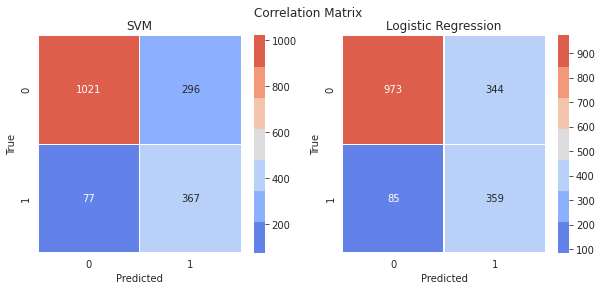

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(svm_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[0], fmt='g')
ax[0].set_title('SVM')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(lr_corr, annot=True, linewidths=.1, cmap=palette, ax=ax[1], fmt='g')
ax[1].set_title('Logistic Regression')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

fig.savefig("correlation_.png", dpi=600)

In [ ]:
# saving the model
import pickle
pickle.dump(model_svm, open('model_svm.sav','wb'))

#Collaborative-filtering

In [ ]:
!pip install surprise

In [ ]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

In [ ]:
df_rec = df[['Customer ID', 'Offer', 'Internet Type']]

In [ ]:
df_rec['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

In [ ]:
df_rec['Internet Type'] = df_rec['Internet Type'].map({'DSL': 0, 'Fiber Optic': 1,'Cable': 2,'None': 3})

In [ ]:
df_rec

,Customer ID,Offer,Internet Type
0,8779-QRDMV,None,0
1,7495-OOKFY,Offer E,1
2,1658-BYGOY,Offer D,1
3,4598-XLKNJ,Offer C,1
4,4846-WHAFZ,Offer C,1
...,...,...,...
7038,2569-WGERO,None,3
7039,6840-RESVB,Offer C,2
7040,2234-XADUH,None,1
7041,4801-JZAZL,None,0


In [ ]:
reader = Reader()
surprise_data = Dataset.load_from_df(df_rec, reader)

In [ ]:
trainset, testset = train_test_split(surprise_data, test_size=.20)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knn_model = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [ ]:
# run the trained model against the testset
test_pred_knn = knn_model.test(testset)
print(accuracy.rmse(test_pred_knn))

RMSE: 1.0663
1.0662634520442382


In [ ]:
test_pred_svd = svd_model.test(testset)
accuracy.rmse(test_pred_svd)

RMSE: 1.0663


1.0662634520442382

In [ ]:
pred_df = pd.DataFrame(test_pred_knn)
pred_df[pred_df['uid'] == '9481-IEBZY'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
4,Offer A,1.0,1.318069


In [ ]:
pred_df_svd = pd.DataFrame(test_pred_svd)
pred_df_svd[pred_df['uid'] == '0374-IOEGQ'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
1,None,2.0,1.318069


In [ ]:
pred_df_svd

,uid,iid,r_ui,est,details
0,0307-BCOPK,Offer D,3.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
1,0374-IOEGQ,None,2.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
2,2651-ZCBXV,Offer B,1.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
3,0004-TLHLJ,Offer E,1.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
4,9481-IEBZY,Offer A,1.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
...,...,...,...,...,...
1404,4821-SJHJV,None,1.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
1405,9135-HSWOC,Offer B,3.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
1406,4992-LTJNE,Offer A,0.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."
1407,3146-JTQHR,Offer D,3.0,1.318069,"{'was_impossible': True, 'reason': 'User and i..."


## Collaborative filtering which I tried here is not suitable I guess or the steps i have taken are incorrect. Should look into this

# Content-based recommendation

In [ ]:
df_content = df[['Customer ID', 'Offer', 'Internet Type', 'Payment Method']]
df_content['Offer'] = df_content['Offer'].replace('None','Offer F')
df_content.set_index('Customer ID', inplace=True)
df_content['bow'] = df_content['Offer'] + ' ' + df_content['Internet Type'] + ' ' + df_content['Payment Method']
df_content

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Offer,Internet Type,Payment Method,bow
Customer ID,,,,
8779-QRDMV,Offer F,DSL,Bank Withdrawal,Offer F DSL Bank Withdrawal
7495-OOKFY,Offer E,Fiber Optic,Credit Card,Offer E Fiber Optic Credit Card
1658-BYGOY,Offer D,Fiber Optic,Bank Withdrawal,Offer D Fiber Optic Bank Withdrawal
4598-XLKNJ,Offer C,Fiber Optic,Bank Withdrawal,Offer C Fiber Optic Bank Withdrawal
4846-WHAFZ,Offer C,Fiber Optic,Bank Withdrawal,Offer C Fiber Optic Bank Withdrawal
...,...,...,...,...
2569-WGERO,Offer F,None,Bank Withdrawal,Offer F None Bank Withdrawal
6840-RESVB,Offer C,Cable,Mailed Check,Offer C Cable Mailed Check
2234-XADUH,Offer F,Fiber Optic,Credit Card,Offer F Fiber Optic Credit Card


In [ ]:
df_content = df[['Customer ID', 'Offer', 'Internet Type', 'Payment Method']]
df_content['Offer'] = df_content['Offer'].replace('None','Offer F')
# df_content['Offer'] = df_content['Offer'].map({'None': 'Offer F'})
df_content.set_index('Customer ID', inplace=True)
df_content1 = pd.DataFrame(df_content['Offer'] + ' ' + df_content['Internet Type'] + ' ' + df_content['Payment Method'], columns=['bow'])
df_content1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bow
Customer ID,
8779-QRDMV,Offer F DSL Bank Withdrawal
7495-OOKFY,Offer E Fiber Optic Credit Card
1658-BYGOY,Offer D Fiber Optic Bank Withdrawal
4598-XLKNJ,Offer C Fiber Optic Bank Withdrawal
4846-WHAFZ,Offer C Fiber Optic Bank Withdrawal
...,...
2569-WGERO,Offer F None Bank Withdrawal
6840-RESVB,Offer C Cable Mailed Check
2234-XADUH,Offer F Fiber Optic Credit Card


In [ ]:
df_content['Offer'].value_counts()

Offer F    3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

Cosine similarity is a metric used to measure how similar two items are.
The cosine similarity measures the similarity between vector lists by calculating the cosine angle between the two vector lists.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df_content['bow'])

# creating a Series for the customer IDs so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df_content.index)
indices[:5]

0    8779-QRDMV
1    7495-OOKFY
2    1658-BYGOY
3    4598-XLKNJ
4    4846-WHAFZ
Name: Customer ID, dtype: object

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.2236068 , 0.67082039, ..., 0.2236068 , 1.        ,
        0.67082039],
       [0.2236068 , 1.        , 0.6       , ..., 1.        , 0.2236068 ,
        0.6       ],
       [0.67082039, 0.6       , 1.        , ..., 0.6       , 0.67082039,
        1.        ],
       ...,
       [0.2236068 , 1.        , 0.6       , ..., 1.        , 0.2236068 ,
        0.6       ],
       [1.        , 0.2236068 , 0.67082039, ..., 0.2236068 , 1.        ,
        0.67082039],
       [0.67082039, 0.6       , 1.        , ..., 0.6       , 0.67082039,
        1.        ]])

In [ ]:
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_offers = []
    
    # gettin the index of the customer ID that
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 3 most similar offers
    top_10_indexes = list(score_series.iloc[1:4].index)
    # print(top_10_indexes)
    
    # populating the list with the offers of the best 10 matching customers
    for i in top_10_indexes:
        recommended_movies.append(list(df_content['Offer'])[i])
        
    return recommended_movies

In [ ]:
indices[indices == '0471-LVHGK']

1422    0471-LVHGK
Name: Customer ID, dtype: object

In [ ]:
recommendations('2569-WGERO')

['Offer F', 'Offer C', 'Offer F']

# Combining both classification model and content-based recommendation

In [ ]:
X_test

,Customer ID,Gender,Age,Married,Dependents,Senior Citizen,Tenure in Months,Phone Service,Multiple Lines,Internet Service,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,NaN,1,35,1,1,0,13,1,0,0,...,0,0,0,1,1,0,0,0,1,0
1,7130-VTEWQ,1,55,0,0,0,8,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,NaN,1,43,0,0,0,48,1,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2931-XIQBR,0,68,0,0,1,4,1,1,1,...,1,0,0,0,1,0,0,1,0,0
4,NaN,1,43,1,1,0,9,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,NaN,0,19,0,1,0,67,1,1,1,...,0,0,1,0,0,1,0,1,0,0
1405,4302-ZYFEL,1,30,0,0,0,5,1,1,1,...,0,0,1,0,1,0,0,1,0,0
1406,4106-HADHQ,0,36,1,0,0,52,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1407,NaN,0,49,1,1,0,40,1,1,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
balance = pd.read_csv('Telco_customer_churn_services_Final_datasheet (1)_processed_balaced.csv')

X_test['Customer ID'] = balance['Customer ID']
X_test.reset_index(inplace=True, drop=True)

In [ ]:
X_test.isna().sum()

Customer ID                       670
Gender                              0
Age                                 0
Married                             0
Dependents                          0
Senior Citizen                      0
Tenure in Months                    0
Phone Service                       0
Multiple Lines                      0
Internet Service                    0
Avg Monthly GB Download             0
Streaming TV                        0
Streaming Movies                    0
Streaming Music                     0
Unlimited Data                      0
Paperless Billing                   0
Monthly Charge                      0
Total Charges                       0
Offer_None                          0
Offer_Offer A                       0
Offer_Offer B                       0
Offer_Offer C                       0
Offer_Offer D                       0
Offer_Offer E                       0
Internet Type_Cable                 0
Internet Type_DSL                   0
Internet Typ

In [ ]:
X_test1 = scaler.transform(X_test.loc[:, X_test.columns != 'Customer ID'])
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns[0:33])

In [ ]:
X_test.shape

(1409, 34)

In [ ]:
X_test1.loc[:, X_test1.columns != 'Customer ID'].loc[[1]]

,Gender,Age,Married,Dependents,Senior Citizen,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Avg Monthly GB Download,...,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card
1,-0.028309,-0.954869,-0.543572,-0.439475,-0.797727,-3.004149,-0.855224,0.523806,-0.216862,-0.792075,...,2.72194,-0.55507,-0.868988,-0.523806,0.976145,-0.536443,-0.59963,0.893142,-0.798618,-0.239651


In [ ]:
X_test1.loc[[1408]]['Customer ID'].values[0]

0.985549901028748

In [ ]:
X_test1.isna().sum()

Customer ID                       0
Gender                            0
Age                               0
Married                           0
Dependents                        0
Senior Citizen                    0
Tenure in Months                  0
Phone Service                     0
Multiple Lines                    0
Internet Service                  0
Avg Monthly GB Download           0
Streaming TV                      0
Streaming Movies                  0
Streaming Music                   0
Unlimited Data                    0
Paperless Billing                 0
Monthly Charge                    0
Total Charges                     0
Offer_None                        0
Offer_Offer A                     0
Offer_Offer B                     0
Offer_Offer C                     0
Offer_Offer D                     0
Offer_Offer E                     0
Internet Type_Cable               0
Internet Type_DSL                 0
Internet Type_Fiber Optic         0
Internet Type_None          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pickle

def recommendations(title, cosine_sim = cosine_sim):
    recommended_movies = []
    
    # gettin the index of the customer ID that
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 3 most similar offers
    top_10_indexes = list(score_series.iloc[1:4].index)
    # print(top_10_indexes)
    
    # populating the list with the offers of the best 10 matching customers
    for i in top_10_indexes:
        recommended_movies.append(list(df_content['Offer'])[i])
        
    return recommended_movies

def run():
    df_content = df[['Customer ID', 'Offer', 'Internet Type', 'Payment Method']]
    df_content['Offer'] = df_content['Offer'].replace('None','Offer F')
    # df_content['Offer'] = df_content['Offer'].map({'None': 'Offer F'})
    df_content.set_index('Customer ID', inplace=True)
    df_content1 = pd.DataFrame(df_content['Offer'] + ' ' + df_content['Internet Type'] + ' ' + df_content['Payment Method'], columns=['bow'])
    df_content1

    # instantiating and generating the count matrix
    count = CountVectorizer()
    count_matrix = count.fit_transform(df_content1['bow'])

    # creating a Series for the customer IDs so they are associated to an ordered numerical
    # list I will use later to match the indexes
    indices = pd.Series(df_content1.index)

    cosine_sim = cosine_similarity(count_matrix, count_matrix)


    balance = pd.read_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed_balaced.csv')

    X_test['Customer ID'] = balance['Customer ID']
    X_test.reset_index(inplace=True, drop=True)

    X_test1 = scaler.transform(X_test.loc[:, X_test.columns != 'Customer ID'])
    X_test1 = pd.DataFrame(X_test1, columns=X_test.columns[0:33])

    model_svm = pickle.load(open('model_svm.sav','rb'))

    ypred = model_svm.predict(X_test1.loc[[1408]])

    if ypred[0] == 0:
        print('Customer is not likely to churn. Thank you!')
    else:
        print('Below are the list of offer suggestions to the given customer\n', recommendations(X_test.loc[[1408]]['Customer ID'].values[0]))
   

    recommendations('2569-WGERO')

In [ ]:
import pickle
model_svm = pickle.load(open('model_svm.sav','rb'))
ypred = model_svm.predict(X_test.loc[:, X_test.columns != 'Customer ID'].loc[[5]])
ypred

array([0])

In [ ]:
ypred = model_svm.predict(X_test1.loc[[1408]])
ypred
# pd.Series(ypred.tolist()).value_counts()

array([1])

In [ ]:
X_test.loc[[1408]]['Customer ID']

1408    NaN
Name: Customer ID, dtype: object

In [ ]:
if ypred[0] == 0:
  print('Customer is not likely to churn. Thank you!')
else:
   print('Below are the list of offer suggestions to the given customer\n', 
         recommendations(X_test.loc[[1408]]['Customer ID'].values[0]))

Below are the offer suggestions to the given customer
 ['Offer F', 'Offer C', 'Offer F']


In [ ]:
X_test.loc[[1408]]['Customer ID']

1408    NaN
Name: Customer ID, dtype: object

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def recommendations(title, cosine_sim):
    recommended_movies = []
    
    print(title)
    # getting the index of the customer ID that
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # getting the indexes of the 3 most similar offers
    top_10_indexes = list(score_series.iloc[1:4].index)
    # print(top_10_indexes)

    # populating the list with the offers of the best 10 matching customers
    for i in top_10_indexes:
        recommended_movies.append(list(df_content['Offer'])[i])

    return recommended_movies


def run():
    DATA_PATH = "./Telco_customer_churn_services_Final_datasheet (1).xlsx"
    df = pd.read_excel(DATA_PATH)

    df_content = df[['Customer ID', 'Offer', 'Internet Type', 'Payment Method']]
    df_content['Offer'] = df_content['Offer'].replace('None','Offer F')
    df_content.set_index('Customer ID', inplace=True)
    df_content['bow'] = df_content['Offer'] + ' ' + df_content['Internet Type'] + ' ' + df_content['Payment Method']
    df_content

    # instantiating and generating the count matrix
    count = CountVectorizer()
    count_matrix = count.fit_transform(df_content['bow'])

    # creating a Series for the customer IDs so they are associated to an ordered numerical
    # list I will use later to match the indexes
    indices = pd.Series(df_content.index)
    cosine_sim = cosine_similarity(count_matrix, count_matrix)

    df_proc = pd.read_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed.csv')
    # split df_proc in feature matrix and target vector
    X = df_proc.drop('Churn', axis=1)
    y = df_proc['Churn']

    # split df_proc between train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    balance = pd.read_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed_balaced.csv')

    X_test['Customer ID'] = balance['Customer ID']
    X_test.reset_index(inplace=True, drop=True)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.loc[:, X_train.columns != 'Customer ID'])
    X_test1 = scaler.transform(X_test.loc[:, X_test.columns != 'Customer ID'])
    X_test1 = pd.DataFrame(X_test1, columns=X_test.columns[0:33])

    model_svm = pickle.load(open('./model_svm.sav', 'rb'))

    ypred = model_svm.predict(X_test1.loc[[1408]])

    if ypred[0] == 0:
        print('Customer is not likely to churn. Thank you!')
    else:
        print('Below are the list of offer suggestions to the given customer\n', 
              recommendations(X_test.loc[[1408]]['Customer ID'].values[0], cosine_sim=cosine_sim))


if __name__ == "__main__":
   print("File one executed when ran directly")
   run()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_PATH = "./Telco_customer_churn_services_Final_datasheet (1).xlsx"
df = pd.read_excel(DATA_PATH)

df_content = df[['Customer ID', 'Offer', 'Internet Type', 'Payment Method']]
df_content['Offer'] = df_content['Offer'].replace('None','Offer F')
df_content.set_index('Customer ID', inplace=True)
df_content['bow'] = df_content['Offer'] + ' ' + df_content['Internet Type'] + ' ' + df_content['Payment Method']
df_content

# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df_content['bow'])

# creating a Series for the customer IDs so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df_content.index)
cosine_sim = cosine_similarity(count_matrix, count_matrix)

df_proc = pd.read_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed.csv')
# split df_proc in feature matrix and target vector
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

balance = pd.read_csv('./Telco_customer_churn_services_Final_datasheet (1)_processed_balaced.csv')

X_test['Customer ID'] = balance['Customer ID']
X_test.reset_index(inplace=True, drop=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.loc[:, X_train.columns != 'Customer ID'])
X_test1 = scaler.transform(X_test.loc[:, X_test.columns != 'Customer ID'])
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns[0:33])



def recommendations(title, cosine_sim):
    recommended_offers = []
    
    # getting the index of the customer ID that
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)

    # getting the indexes of the 3 most similar offers
    top_10_indexes = list(score_series.iloc[1:4].index)
    # print(top_10_indexes)

    # populating the list with the offers of the best 10 matching customers
    for i in top_10_indexes:
        recommended_offers.append(list(df_content['Offer'])[i])

    return recommended_offers


def predict(index):
    model_svm = pickle.load(open('./model_svm.sav', 'rb'))
    ypred = model_svm.predict(X_test1.loc[[index]])
    print(ypred)

    if ypred[0] == 0:
        print('Customer is not likely to churn. Thank you!')
    else:
        # print(X_test.loc[[index]]['Customer ID'].values[0])
        print('Below are the list of offer suggestions to the given customer\n',
              recommendations(X_test.loc[[index]]['Customer ID'].values[0], cosine_sim=cosine_sim))


if __name__ == "__main__":
    print('below sample dataframe to enter the number\n', X_test.head(10))
    value = int(input('enter the index of the customer ID to predict the offers: '))
    predict(value)

## Above content based recommendation is giving decent results for each customer and it can be used for further improvement.

## Conclusion

No algorithm will predict churn with 100% accuracy. There will always be a trade-off between precision and recall. That's why it's important to test and understand the strengths and weaknesses of each classifier and get the best out of each. 

If the goal is to engage and reach out to the customers to prevent them from churning, it's acceptable to engage with those who are mistakenly tagged as 'churned,' as it does not cause any negative problem. It could potentially make them even happier with the service. This is the kind of model that can add value from day one if proper action is taken out of it.